### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])
faturamento = todas_lojas.groupby('Loja')['Preço'].sum()

print(faturamento)

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# 2. Vendas por Categoria

In [5]:
categoria_loja1= loja['Categoria do Produto'].value_counts()

categoria_loja2= loja2['Categoria do Produto'].value_counts()

categoria_loja3= loja3['Categoria do Produto'].value_counts()

categoria_loja4= loja4['Categoria do Produto'].value_counts()

print(f"Informações Loja 1:\n \n {categoria_loja1}\n\nInformações Loja 2: \n\n {categoria_loja2}\n\nInformações Loja 3: \n\n {categoria_loja3}\n\nInformações Loja 4: \n\n {categoria_loja4}")



Informações Loja 1:
 
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Informações Loja 2: 

 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Informações Loja 3: 

 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Informações Loja 4: 

 Categoria do Produto
moveis                   480
eletronicos       

In [6]:
contagem_categorias = todas_lojas['Categoria do Produto'].value_counts()
contagem_categorias


,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


In [7]:
analise= todas_lojas.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

print(analise)


Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                                         
Loja 1                  

# 3. Média de Avaliação das Lojas


In [25]:
media_avaliacoes = todas_lojas.groupby('Loja')['Avaliação da compra'].mean()
media_avaliacoes

,Avaliação da compra
Loja,
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [41]:
tabela_vendas = pd.crosstab(todas_lojas['Produto'], todas_lojas['Loja'])

print("--- Quantidade de Vendas por Produto e Loja ---")
display(tabela_vendas)

--- Quantidade de Vendas por Produto e Loja ---


Loja,Loja 1,Loja 2,Loja 3,Loja 4
Produto,,,,
Assistente virtual,40,38,39,50
Bateria,53,61,41,48
Bicicleta,54,45,52,45
Blocos de montar,56,54,35,54
Bola de basquete,55,42,50,50
Bola de vôlei,42,46,48,48
Boneca bebê,40,48,39,48
Cadeira de escritório,46,49,46,40
Cama box,44,47,46,62


In [45]:
for loja in tabela_vendas.columns:
  produto_mais_vendido = tabela_vendas[loja].idxmax()
  quantidade_maxima= tabela_vendas[loja].max()

  produto_menos_vendido = tabela_vendas[loja].idxmin()
  quantidade_minima= tabela_vendas[loja].min()

  print(f"{loja}\n")
  print(f"Produto mais vendido: {produto_mais_vendido} --> Quantidade: {quantidade_maxima}")
  print(f"Produto menos vendido: {produto_menos_vendido} --> Quantidade: {quantidade_minima}\n")


Loja 1

Produto mais vendido: Guarda roupas --> Quantidade: 60
Produto menos vendido: Celular ABXY --> Quantidade: 33

Loja 2

Produto mais vendido: Iniciando em programação --> Quantidade: 65
Produto menos vendido: Jogo de tabuleiro --> Quantidade: 32

Loja 3

Produto mais vendido: Kit banquetas --> Quantidade: 57
Produto menos vendido: Blocos de montar --> Quantidade: 35

Loja 4

Produto mais vendido: Cama box --> Quantidade: 62
Produto menos vendido: Guitarra --> Quantidade: 33



# 5. Frete Médio por Loja

In [50]:
custo_frete_medio = todas_lojas.groupby('Loja')['Frete'].mean()

print("--- Custo Médio de Frete por Loja ---")
print(custo_frete_medio)

--- Custo Médio de Frete por Loja ---
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


#**6.Gráficos**

/tmp/ipython-input-1650730840.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=faturamento.index, y=faturamento.values, palette='Greens_d')


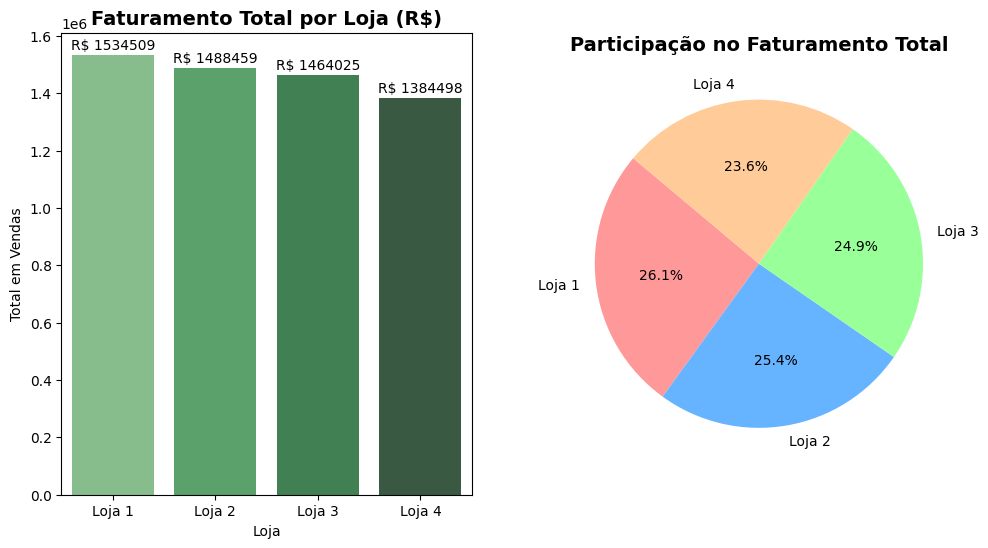

In [62]:
plt.figure(figsize=(18, 6))

# --- GRÁFICO 1: Faturamento Total
plt.subplot(1, 3, 1)
faturamento = todas_lojas.groupby('Loja')['Preço'].sum()

ax1 = sns.barplot(x=faturamento.index, y=faturamento.values, palette='Greens_d')
plt.title('Faturamento Total por Loja (R$)', fontsize=14, weight='bold')
plt.ylabel('Total em Vendas')

for i in ax1.containers:
    ax1.bar_label(i, fmt='R$ %.0f', padding=2)


# --- GRÁFICO 2: Fatia de Mercado
plt.subplot(1, 3, 2)
plt.pie(faturamento.values, labels=faturamento.index, autopct='%1.1f%%',
        startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Participação no Faturamento Total', fontsize=14, weight='bold')

plt.show()

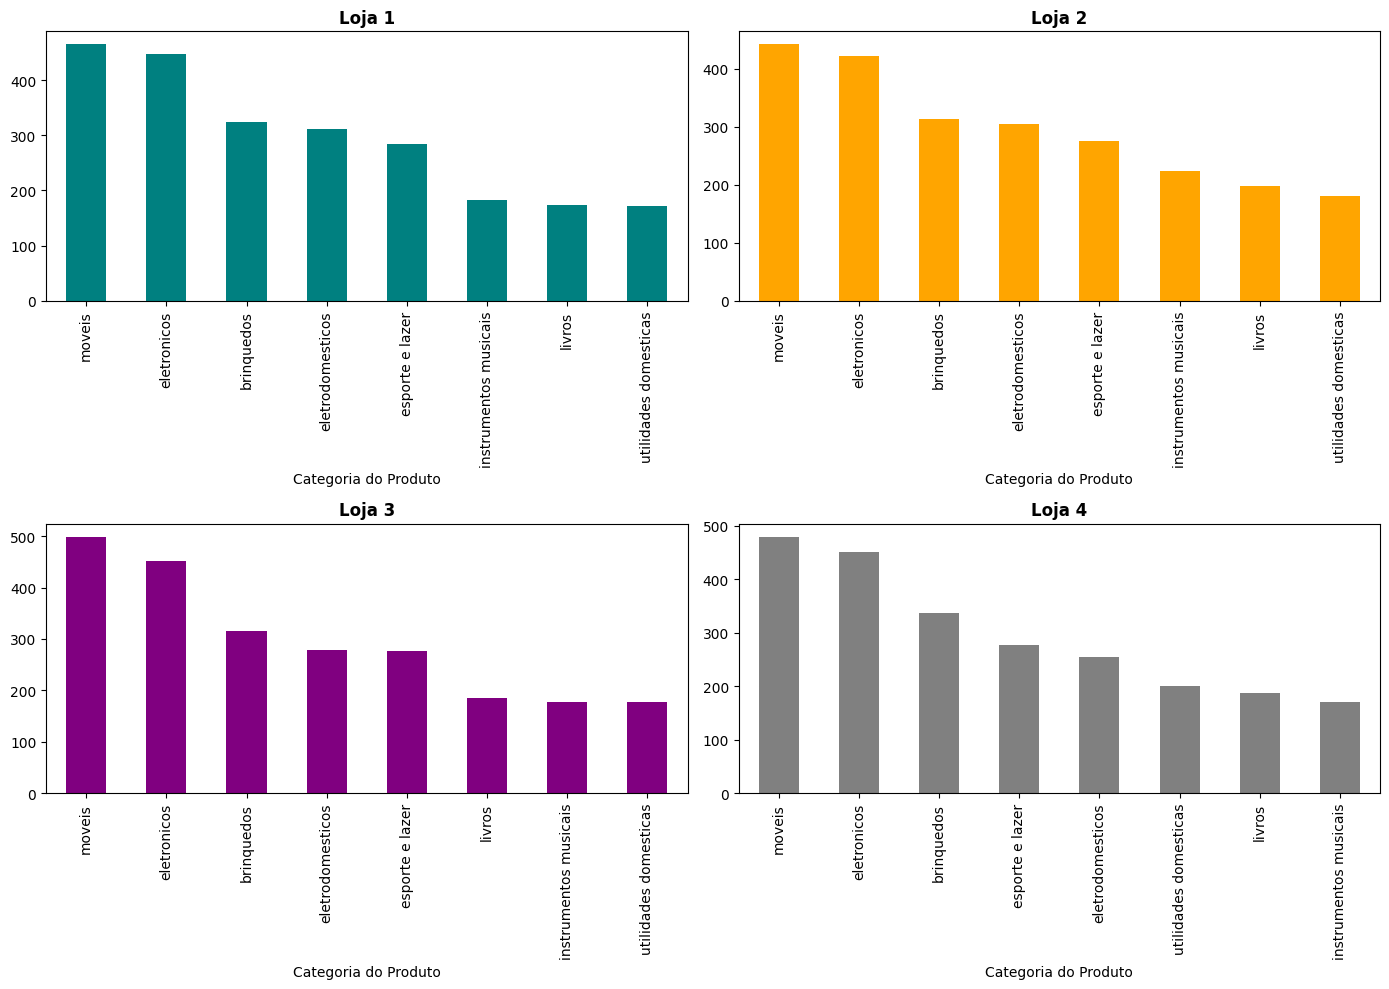

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

categoria_loja1.plot(kind='bar', ax=axs[0, 0], color='teal')
axs[0, 0].set_title('Loja 1', weight='bold')

categoria_loja2.plot(kind='bar', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Loja 2', weight='bold')

categoria_loja3.plot(kind='bar', ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Loja 3', weight='bold')

categoria_loja4.plot(kind='bar', ax=axs[1, 1], color='gray')
axs[1, 1].set_title('Loja 4', weight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3591233495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=todas_lojas, x='Categoria do Produto', palette='viridis')


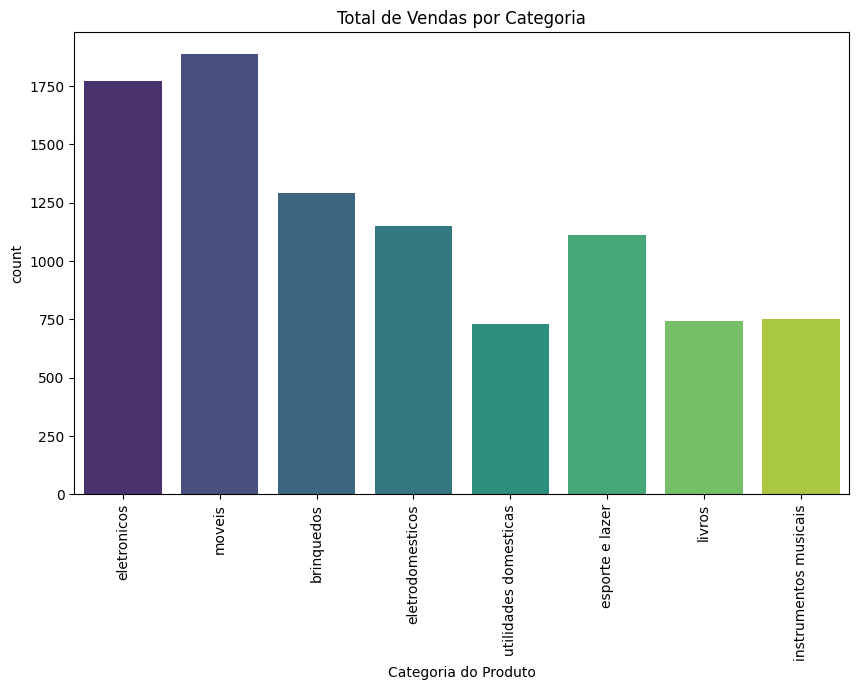

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=todas_lojas, x='Categoria do Produto', palette='viridis')

plt.title('Total de Vendas por Categoria')
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-107316418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=todas_lojas, x='Loja', y='Avaliação da compra', palette='deep')


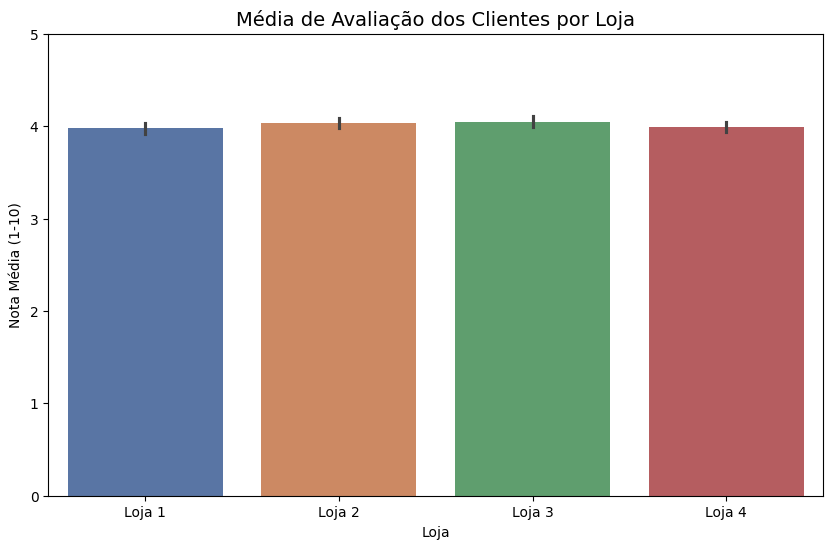

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=todas_lojas, x='Loja', y='Avaliação da compra', palette='deep')

plt.title('Média de Avaliação dos Clientes por Loja', fontsize=14)
plt.ylabel('Nota Média (1-10)')
plt.ylim(0, 5)
plt.show()

# **7.Relatório Técnico**

#Análise de Desempenho das Lojas.

##**Introdução**
O objetivo desta análise foi avaliar o desempenho das 04 (quatro) empresas da rede de varejo do Sr. João.  Foi utilizado para idendificar padrões dados de vendas, avaliações e custos. Este relatórrio tem como principal finalidade fornecer uma recomendação baseada nos dados fornecidos das 04 filiais e mostrar qual loja se demonstra menos rentável, mostrando-se desta forma a filial recomendada para venda.

##**Análise dos Dados**
### Faturamento Total
Ao analizar o faturamento final de cada empresa, foi observado:
  - A loja 1 lidera o ranking  de faturamento com o total de R$ 1.534.509,12, onde se mostrou ser a unidade que trouxe maior retorno financeiro ao Sr. João.

  - Em contrapartida, a Loja 4 se mostrou trazer o menor retorno financeiro, com aproximadamente R$150 mil abaixo da loja 1.

### Satisfação dos Clientes
Um fator importante é a aferição de qualidade de serviço prestado, produtos e atendimento, neste sentido o indicador nas avaliaççoes obtidas foi:
 - A média geral das avaliações da rede gira em torno de 4.0

 - A Loja 3 obteve a melhor nota média (4.05), indicando excelência no serviço.

 - A Loja 1, apesar do alto faturamento, teve a pior avaliação (3.98), o que sugere que o alto volume de vendas pode estar comprometendo a qualidade do atendimento ou entrega.

 ### Custos de Frete
O custo do frete impacta diretamente a decisão de compra e a margem de lucro.
 - A Loja 1 possui o frete médio mais caro da rede (R$ 34,69), o que pode explicar a insatisfação dos clientes apontada no item anterior.

 - A Loja 4 apresentou o frete mais competitivo/barato (R$ 31,28), mas mesmo assim não conseguiu converter essa vantagem em maior volume de vendas.

 ### Produtos da Loja de menor desempenho
 Analisando a Loja 4 que obteve menor faturamento.
 - Produto Mais Vendido: Cama box (62 unidades).

 - Produto Menos Vendido: Guitarra (33 unidades).

 - Isso indica que o perfil de consumo desta unidade está focado em móveis, enquanto itens de lazer/música têm pouca saída.

 ## Considerações Finais
Com base nos indicadores analisados, recomendamos a venda da LOJA 4.

 #### **Justificativa:**

 Apesar de a Loja 4 apresentar bons indicadores operacionais (frete mais barato e nota de avaliação), ela falha no quesito principal, o Volume de Receita.


 #### **Baixo Faturamento:**
É a unidade que traz o menor retorno financeiro bruto para a empresa, faturando cerca de 10% a menos que a líder.


#### **Baixa Conversão:**
Mesmo com o frete mais atrativo da rede (R$ 31,28), a loja não consegue alavancar suas vendas para superar as concorrentes.

### **OBSERVAÇÃO**
Recomenda-se uma auditoria na loja 1, embora seja a líder em vendas entre as lojas do Sr. João, a unidade apresenta indicadores (pior avaliação e frete mais caro) Preocupantes que podem afetar sua liderança e rentabilidade.